### CS 125 Assignment

Before you turn this assignment in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Leo Wheeler"
COLLABORATORS = ""

---
---

# Lab 8

Objectives:

- Gain additional experience with File IO (Input/Output)
- Practice filtering data
- String Manipulation with data files
- Creating and using Python Dictionaries



---


## Created by:
- Michael Stobb
- With collaborators: 
    - None
- Lab8

Remember that you are **encouraged** to collaborate on lab activities – just be sure to: 
1. Document your collaborators and sources.
2. Don’t electronically share the code.
3. Understand what you submit. 


---

## Getting Started

The following readings should be done **before** starting the lab assignment.  Be sure you fully understand what each line is doing and what it means before moving on.  If something doesn't make sense, you should:
1. Try different things (write some code, see what happens)
2. Ask a friend
3. Go to office hours

### Dictionaries

With Lists, we associate a value with a location in the collection. We use a numeric index to lookup a value. Dictionaries are another valuable structure that is used to associate data. We use a **key** to lookup a value instead of an index. The critical difference is that indexes are always numeric (specifically integers) – but a key can be *any immutable* type.

Recall from class that dictionaries are represented in python using {}. To create an empty dictionary you can type:

In [6]:
d = {}

To create a dictionary with some entries – can literally enter key:value pairs.

In [2]:
d2 = {"a": 1,"b":2}

In this case, the keys for d2 are "a" and "b"; the values are 1 and 2.
Try this:

In [2]:
d2.keys()

dict_keys(['a', 'b'])

Notice that it gives you something back, but it isn‘t clear how to use this. For example, try:

In [3]:
k = d2.keys()
k[0]

TypeError: 'dict_keys' object is not subscriptable

What happens?
It turns out that dict_keys is not like other collections. However, it can easily be converted into a list by
simply casting it.

In [4]:
k = list(d2.keys())
k[0]

'a'

What do you get for each of the following:

In [3]:
v = d2.values()
i = d2.items()

In [4]:
v

dict_values([1, 2])

In [5]:
i

dict_items([('a', 1), ('b', 2)])

How would you convert these return values into something that you can use?
As with lists, dictionaries are mutable. You can change the value associated with a key by directly
assigning it.

In [7]:
d["b"] = 5
d

{'b': 5}

Unlike lists, you can directly add entries to the dictionary by simply assigning a value to a key.

In [8]:
d["c"] = 3
d

{'b': 5, 'c': 3}

You can also create a dictionary by merging together two lists:

In [9]:
L1 = ["one","two","three"]
L2 = ["uno","dos","tres"]
L3 = []
for i in range(len(L1)):
    L3.append((L1[i], L2[i]))

Look at what is in L3 and make sure you understand....

In [10]:
L3 

[('one', 'uno'), ('two', 'dos'), ('three', 'tres')]

In [11]:
d = dict(L3)
d["two"]

'dos'

Of course Python can make this simpler with a built in function– zip:

In [12]:
dz = dict(zip(L1,L2))

In [13]:
dz

{'one': 'uno', 'two': 'dos', 'three': 'tres'}

# Assignment

Morse code was developed around 1837 by Samuel Morse for use with the newly invented Telegraph machine.  This code converts letters and numbers into a series of audible *dashes* and *dots*.  These dashes and dots are commonly written out using the `-` as the dash and the `.` as the dot, such that the letter `L` is represented as `.-..`.  While invented long ago, Morse code is still in active use today.  

Your job is to ultimately write two functions: One for converting enlish to Morse code, and another for converting Morse code back into english letters.  The file "/srv/data/lab8/morse.txt" contains the encoded letters in alphabetical order (A-Z).  Each line of the file is a **single letter**, so that the first line correspondes to "A" and the last line corresponds to "Z".

#### Problem 0

Using the morse.txt file, create two dictionaries:
   - `e_to_m`: English letters are the key, and Morse code is the value.
   - `m_to_e`: Morse code is the key, and english letters are the value.
   - Recall: 
        - The ascii capital letters start at 65 and end at 90
        - chr(65) = "A"
        
One of my dictionaries looks like

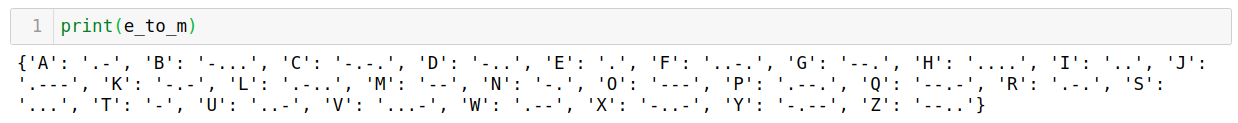

In [92]:
def making_dictionaries():
    open_file = open("/srv/data/lab8/morse.txt")
    morse_chart = open_file.readlines()
    e_to_m = {}
    m_to_e = {}
    x = 65
    for line in morse_chart:
        line = line.strip("\n")
        m_to_e[line] = chr(x)
        e_to_m[chr(x)] = line
        x += 1
    open_file.close()
    return e_to_m, m_to_e

In [93]:
making_dictionaries()

({'A': '.-',
  'B': '-...',
  'C': '-.-.',
  'D': '-..',
  'E': '.',
  'F': '..-.',
  'G': '--.',
  'H': '....',
  'I': '..',
  'J': '.---',
  'K': '-.-',
  'L': '.-..',
  'M': '--',
  'N': '-.',
  'O': '---',
  'P': '.--.',
  'Q': '--.-',
  'R': '.-.',
  'S': '...',
  'T': '-',
  'U': '..-',
  'V': '...-',
  'W': '.--',
  'X': '-..-',
  'Y': '-.--',
  'Z': '--..'},
 {'.-': 'A',
  '-...': 'B',
  '-.-.': 'C',
  '-..': 'D',
  '.': 'E',
  '..-.': 'F',
  '--.': 'G',
  '....': 'H',
  '..': 'I',
  '.---': 'J',
  '-.-': 'K',
  '.-..': 'L',
  '--': 'M',
  '-.': 'N',
  '---': 'O',
  '.--.': 'P',
  '--.-': 'Q',
  '.-.': 'R',
  '...': 'S',
  '-': 'T',
  '..-': 'U',
  '...-': 'V',
  '.--': 'W',
  '-..-': 'X',
  '-.--': 'Y',
  '--..': 'Z'})

#### Problem 1
Write a function which takes as input a string and prints out the corresponding code.  
- After each Morse code letter, print a single blank space.
- After each word, print a newline.
- Ignore numbers or symbols that are not in the dictionary.

My function looks like the following:
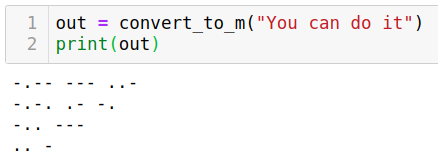

In [72]:
def convert_to_m(english):
    e_to_m, m_to_e = making_dictionaries()
    english = [c for c in english.upper()]
    morse = ""
    for i in english:
        if i in e_to_m.keys():
            morse += e_to_m[i] + " "
        elif i == " ":
            morse += "\n"
        else:
            continue
    print(morse)
    return morse

In [73]:
convert_to_m("hello professor stobb")

.... . .-.. .-.. --- 
.--. .-. --- ..-. . ... ... --- .-. 
... - --- -... -... 


'.... . .-.. .-.. --- \n.--. .-. --- ..-. . ... ... --- .-. \n... - --- -... -... '

#### Problem 2
Write a function which takes as input a string **or Morse code** and prints out the corresponding English letters.  You should still assume that
- After each Morse code letter, there is single blank space.
- After each word, there is a newline.
- There should be no other numbers or punctuation.

If done correctly, this function should almost perfectly undo the previous function written in (1).

My function looks like the following:
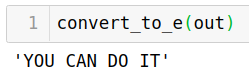

In [98]:
def convert_to_e(morse):
    e_to_m, m_to_e = making_dictionaries()
    morse = morse.replace("\n", "\n ").split(" ")
    english = ""
    for i in morse:
        if i == "":
            continue
        elif i in m_to_e.keys():
            english += m_to_e[i]
        elif i == "\n":
            english += " "
        else:
            english += "?"
    print(english)
    return english

In [99]:
convert_to_e("... --- ...")

SOS


'SOS'

#### Problem 3
Using your function from Problem 2, translate the file in "/srv/data/lab8/hidden_message.txt".

In [100]:
open_file = open("/srv/data/lab8/hidden_message.txt")
hidden_message = open_file.read()
convert_to_e(hidden_message)

PROBABLY MY FAVORITE POET IS JOHN KEATS  HIS TRAGIC LIFE COUPLED WITH HIS POETIC GENIUS LEAVE ME AWED  IF YOU HAVE NEVER READ HIS WORK YOU SHOULD  ALSO IF YOU HAVE NOT YET STARTED YOUR HOMEWORK  NOW WOULD BE A GOOD TIME


'PROBABLY MY FAVORITE POET IS JOHN KEATS  HIS TRAGIC LIFE COUPLED WITH HIS POETIC GENIUS LEAVE ME AWED  IF YOU HAVE NEVER READ HIS WORK YOU SHOULD  ALSO IF YOU HAVE NOT YET STARTED YOUR HOMEWORK  NOW WOULD BE A GOOD TIME'